In this work I’ll use iris dataset to compare FastAI , PyTorch & Keras Classification abilities .
Iris dataset contains 150 observations(50 observations of each species (setosa, versicolor, virginica)) with 4 features each (sepal length, sepal width, petal length, petal width)
No empty or NA values in dataset.


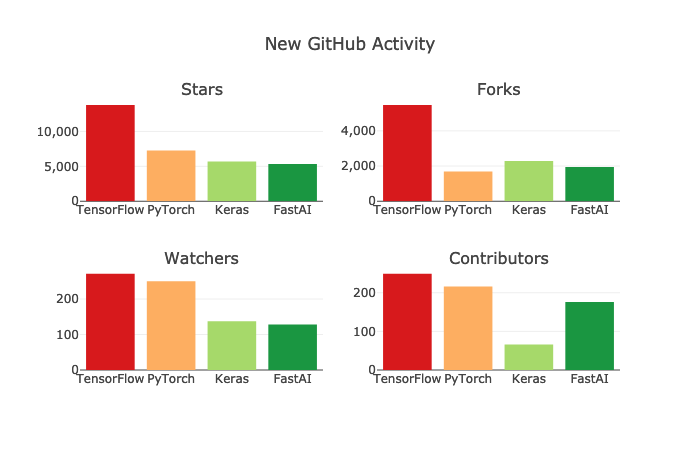

# imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('../input/Iris.csv')

# Get information on dataset

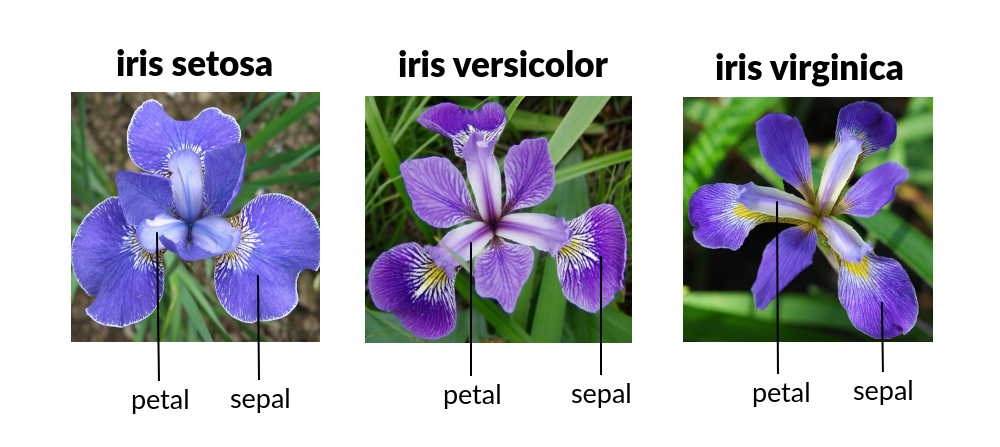

In [2]:
 np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [3]:
data.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# Data Visualization
- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).


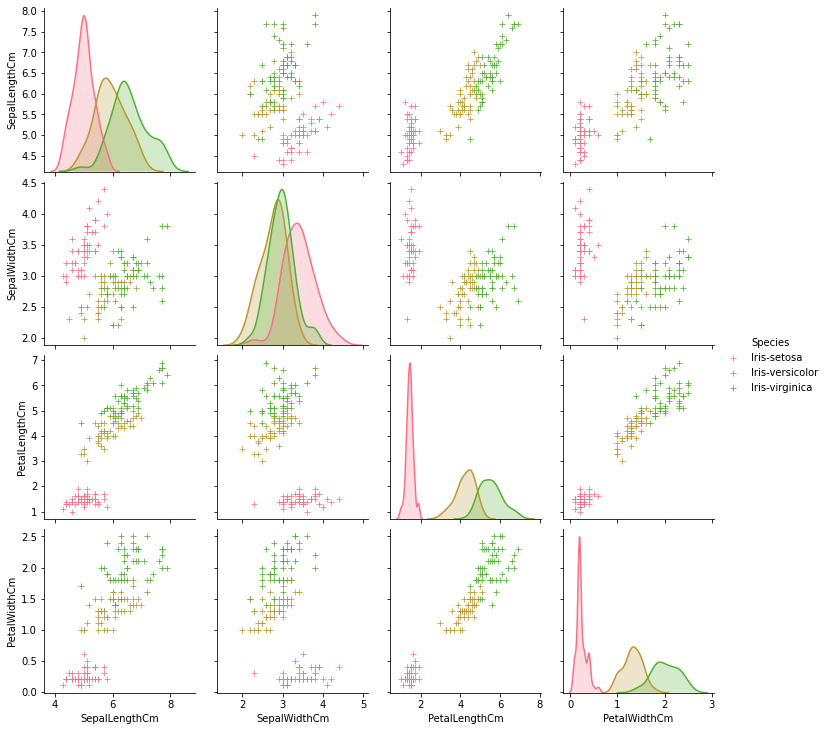

In [8]:
tmp = data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

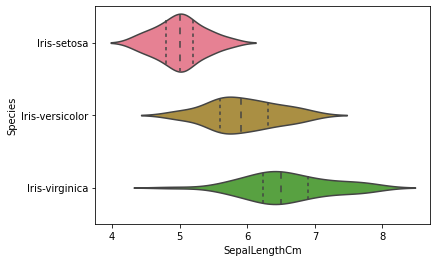

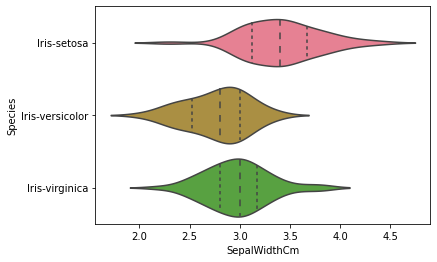

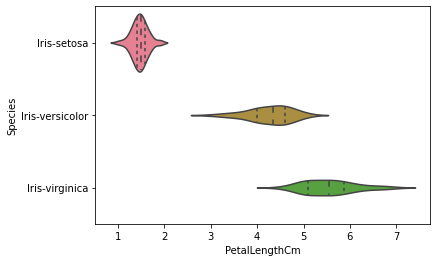

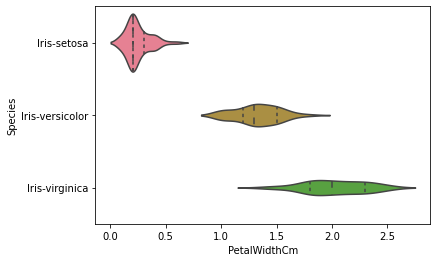

In [9]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

# preprocessing data :

1.Drop id column 
2.Tried to normalize features but it didn’t improve accuracy results -note that all 4 features are at the same range {~0-10} 


In [10]:
from sklearn.preprocessing import StandardScaler

#data['SepalLengthCm'] = StandardScaler().fit_transform(data['SepalLengthCm'].values.reshape(-1, 1))
#data['SepalWidthCm'] = StandardScaler().fit_transform(data['SepalLengthCm'].values.reshape(-1, 1))
#data['PetalLengthCm'] = StandardScaler().fit_transform(data['SepalLengthCm'].values.reshape(-1, 1))
#data['PetalWidthCm'] = StandardScaler().fit_transform(data['SepalLengthCm'].values.reshape(-1, 1))

X = data.drop(['Id', 'Species'], axis=1)

Y = data['Species']
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


# Split train & test data (75%-25%)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)


# Use sklearn

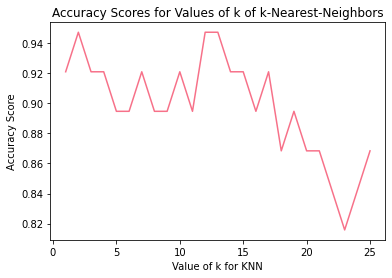

In [12]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [13]:
#from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.linear_model import RANSACRegressor
logreg =AdaBoostClassifier(n_estimators=20, random_state=0)#svm.SVC() -0.87 , xgboost -0.87,LogisticRegression-0.9,AdaBoostClassifier-0.95
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


# Pytorch

In [14]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import torch.nn.functional as F


features, labels = load_iris(return_X_y=True)


Using TensorFlow backend.


In [15]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim,50)
        self.layer2 = nn.Linear(50, 25)
        self.layer3 = nn.Linear(25, 10)
        self.layer4 = nn.Linear(10, 3)
 

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.softmax(self.layer4(x)) # To check with the loss function
        return x
    

In [16]:
model = Model(features.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
epochs = 100

def print_(loss):
    print ("The loss calculated: ", loss)

In [17]:
features_train,features_test, labels_train, labels_test = train_test_split(features, labels, random_state=42, shuffle=True)
# Not using dataloader
x_train, y_train = Variable(torch.from_numpy(features_train)).float(), Variable(torch.from_numpy(labels_train)).long()
for epoch in range(1, epochs+1):
    print ("Epoch #",epoch)
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    print_(loss.item())
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward() # Gradients
    optimizer.step() # Update

Epoch # 1
The loss calculated:  1.1027452945709229
Epoch # 2
The loss calculated:  1.0963231325149536
Epoch # 3
The loss calculated:  1.0912387371063232
Epoch # 4
The loss calculated:  1.0852853059768677
Epoch # 5
The loss calculated:  1.078546166419983
Epoch # 6
The loss calculated:  1.070870041847229
Epoch # 7
The loss calculated:  1.0611382722854614
Epoch # 8
The loss calculated:  1.049204707145691
Epoch # 9
The loss calculated:  1.037402868270874
Epoch # 10
The loss calculated:  1.0236846208572388
Epoch # 11
The loss calculated:  1.0105223655700684
Epoch # 12
The loss calculated:  0.9976925849914551
Epoch # 13
The loss calculated:  0.9835556149482727
Epoch # 14
The loss calculated:  0.9665288925170898
Epoch # 15
The loss calculated:  0.9500049352645874
Epoch # 16
The loss calculated:  0.9307583570480347
Epoch # 17
The loss calculated:  0.9083009362220764
Epoch # 18
The loss calculated:  0.8803507089614868
Epoch # 19
The loss calculated:  0.8473137021064758
Epoch # 20
The loss calcu

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


 27
The loss calculated:  0.6187142729759216
Epoch # 28
The loss calculated:  0.6117028594017029
Epoch # 29
The loss calculated:  0.6063036918640137
Epoch # 30
The loss calculated:  0.5991503596305847
Epoch # 31
The loss calculated:  0.5952019095420837
Epoch # 32
The loss calculated:  0.5938256978988647
Epoch # 33
The loss calculated:  0.59013432264328
Epoch # 34
The loss calculated:  0.5876840353012085
Epoch # 35
The loss calculated:  0.5876466035842896
Epoch # 36
The loss calculated:  0.5854719877243042
Epoch # 37
The loss calculated:  0.583578884601593
Epoch # 38
The loss calculated:  0.5842058062553406
Epoch # 39
The loss calculated:  0.5830159783363342
Epoch # 40
The loss calculated:  0.5810290575027466
Epoch # 41
The loss calculated:  0.5823766589164734
Epoch # 42
The loss calculated:  0.5819358825683594
Epoch # 43
The loss calculated:  0.5794719457626343
Epoch # 44
The loss calculated:  0.582539975643158
Epoch # 45
The loss calculated:  0.5815581679344177
Epoch # 46
The loss cal

In [18]:
x_test = Variable(torch.from_numpy(features_test)).float()
pred = model(x_test)
pred = pred.detach().numpy()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [19]:
print ("The accuracy is", accuracy_score(labels_test, np.argmax(pred, axis=1)))


The accuracy is 0.9736842105263158


# KERAS

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation , Dropout
from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(input_dim=features.shape[1], output_dim=30, activation='relu',activity_regularizer=regularizers.l2(10e-5)))
#model.add(Dropout(0.2))
model.add(Dense(input_dim=30, output_dim=10, activation='relu'))
model.add(Dense(input_dim=10, output_dim=3,activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]) #sgd,adam
#model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=4, activation="relu", activity_regularizer=<tensorflo..., units=30)`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=30, activation="relu", units=10)`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, activation="softmax", units=3)`
  if __name__ == '__main__':


In [21]:
import keras

#labels_onehot=to_categorical(labels, num_classes = 3)


X_train,X_test, y_train,y_test = train_test_split(features,labels,test_size=0.1,random_state=0)
y_train_onehot= pd.get_dummies(y_train).values
y_test_onehot=pd.get_dummies(y_test).values
history = model.fit(X_train, y_train_onehot, epochs=100,batch_size=15) # validation_split = 0.25#batch_size=4)
y_pred = model.predict(X_test)



Epoch 1/100
135/135 [==============================] - 0s 2ms/step - loss: 1.8016 - accuracy: 0.3111
Epoch 2/100
135/135 [==============================] - 0s 84us/step - loss: 1.4721 - accuracy: 0.3111
Epoch 3/100
135/135 [==============================] - 0s 92us/step - loss: 1.2880 - accuracy: 0.3111
Epoch 4/100
135/135 [==============================] - 0s 90us/step - loss: 1.2114 - accuracy: 0.3111
Epoch 5/100
135/135 [==============================] - 0s 107us/step - loss: 1.1569 - accuracy: 0.3111
Epoch 6/100
135/135 [==============================] - 0s 100us/step - loss: 1.1231 - accuracy: 0.4593
Epoch 7/100
135/135 [==============================] - 0s 101us/step - loss: 1.1006 - accuracy: 0.7185
Epoch 8/100
135/135 [==============================] - 0s 86us/step - loss: 1.0808 - accuracy: 0.8667
Epoch 9/100
135/135 [==============================] - 0s 94us/step - loss: 1.0633 - accuracy: 0.8074
Epoch 10/100
135/135 [==============================] - 0s 89us/step - loss: 1.0

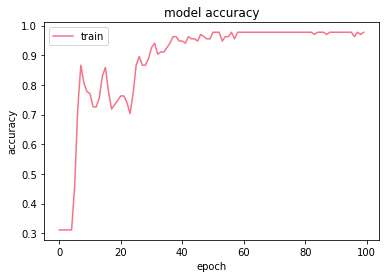

In [22]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix


y_test_class = np.argmax(y_test_onehot,axis=1) # convert encoded labels into classes: say [0, 0, 1] -->  [2] i.e Iris-virginica
y_pred_class = np.argmax(y_pred,axis=1) # convert predicted labels into classes: say [0.00023, 0.923, 0.031] -->  [1] i.e. Iris-versicolor

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# FAST AI

In [24]:
from fastai import *
from fastai.tabular import *
from fastai.metrics import *

In [25]:
df=data
df = df.sample(frac=1).reset_index(drop=True)


dep_var = "Species"
cont_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
procs = [Normalize]

data = (TabularList.from_df(df,cont_names=cont_names,procs=procs)
       .split_subsets(train_size=0.85,valid_size=0.15,seed=42)
       .label_from_df(cols=dep_var)
       .databunch())

learn = tabular_learner(data,layers=[100,50],metrics=accuracy)


In [26]:
learn.fit_one_cycle(50,1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,1.087849,1.067719,0.636364,00:00
1,1.076841,1.066720,0.681818,00:00
2,1.078632,1.065348,0.681818,00:00
3,1.064343,1.061793,0.636364,00:00
4,1.064337,1.056412,0.545455,00:00
5,1.046552,1.049191,0.545455,00:00
6,1.036667,1.039512,0.681818,00:00
7,1.019785,1.027103,0.681818,00:00
8,1.003886,1.010774,0.727273,00:00
9,0.979179,0.991367,0.681818,00:00


In [27]:
learn.unfreeze()

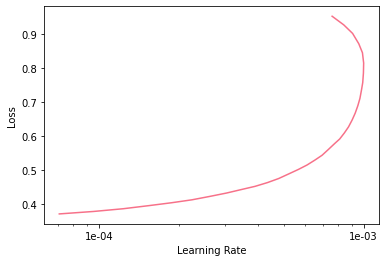

In [28]:
learn.recorder.plot()

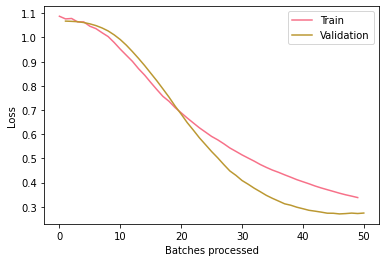

In [29]:
learn.recorder.plot_losses()